# Compile Tuned models

We grab the tuned models (performed using the Levenberg Marquadt algorithm on the Sciama HPC).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import re
import json
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from gzbuilder_analysis.parsing import unmake_json
from gzbuilder_analysis.fitting import Model, loss
import lib.galaxy_utilities as gu

/opt/apps/pkgs/anaconda3/2019.03/intel64/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [3]:
def make_model(subject_id, m):
    psf = gu.get_psf(subject_id)
    diff_data = gu.get_diff_data(subject_id)
    pixel_mask = 1 - np.array(diff_data['mask'])[::-1]
    galaxy_data = np.array(diff_data['imageData'])[::-1]
    return Model(m, galaxy_data, psf=psf, pixel_mask=pixel_mask)

In [4]:
AGG_MODEL_PATH = 'output_files/tuned_models/agg'
BI_MODEL_PATH = 'output_files/tuned_models/bi'

In [5]:
# Parameters
AGG_MODEL_PATH = "/users/tingard/gzbuilder_results/output_files/tuned_models/agg"
BI_MODEL_PATH = "/users/tingard/gzbuilder_results/output_files/tuned_models/bi"


In [6]:
available_agg_models = [
  i for i in os.listdir(AGG_MODEL_PATH)
  if re.match(r'[0-9]+\.json', i)
]
available_bi_models = [
  i for i in os.listdir(BI_MODEL_PATH)
  if re.match(r'[0-9]+\.json', i)
]

In [7]:
agg_models = pd.Series([])
agg_losses = pd.Series([]).rename('agg_loss')
with tqdm(available_agg_models, desc='Aggregate') as bar:
  for f in bar:
    subject_id = int(f.split('.')[0])
    with open(os.path.join(AGG_MODEL_PATH, f)) as f_in:
      model = unmake_json(json.load(f_in))
    model_obj = make_model(subject_id, model)
    agg_models[subject_id] = model_obj

    r = model_obj.render()
    agg_losses[subject_id] = loss(
      r,
      model_obj.data,
      pixel_mask=model_obj.pixel_mask
    )

Aggregate:   0%|          | 0/296 [00:00<?, ?it/s]

Aggregate:   0%|          | 1/296 [00:17<1:24:38, 17.22s/it]

Aggregate:   1%|          | 2/296 [00:45<1:40:25, 20.49s/it]

Aggregate:   1%|          | 3/296 [00:47<1:13:34, 15.07s/it]

Aggregate:   1%|▏         | 4/296 [00:51<56:23, 11.59s/it]  

Aggregate:   2%|▏         | 5/296 [01:02<55:39, 11.48s/it]

Aggregate:   2%|▏         | 6/296 [01:06<45:02,  9.32s/it]

Aggregate:   2%|▏         | 7/296 [01:32<1:09:16, 14.38s/it]

Aggregate:   3%|▎         | 8/296 [01:35<52:20, 10.90s/it]  

Aggregate:   3%|▎         | 9/296 [01:39<41:32,  8.69s/it]

Aggregate:   3%|▎         | 10/296 [01:39<29:42,  6.23s/it]

Aggregate:   4%|▎         | 11/296 [01:48<33:16,  7.01s/it]

Aggregate:   4%|▍         | 12/296 [01:51<26:55,  5.69s/it]

Aggregate:   4%|▍         | 13/296 [01:52<20:05,  4.26s/it]

Aggregate:   5%|▍         | 14/296 [01:52<14:49,  3.15s/it]

Aggregate:   5%|▌         | 15/296 [01:55<14:12,  3.03s/it]

Aggregate:   5%|▌         | 16/296 [02:05<24:27,  5.24s/it]

Aggregate:   6%|▌         | 17/296 [02:07<19:08,  4.12s/it]

Aggregate:   6%|▌         | 18/296 [02:11<19:29,  4.21s/it]

Aggregate:   6%|▋         | 19/296 [02:12<14:16,  3.09s/it]

Aggregate:   7%|▋         | 20/296 [02:14<12:42,  2.76s/it]

Aggregate:   7%|▋         | 21/296 [02:19<15:53,  3.47s/it]

Aggregate:   7%|▋         | 22/296 [02:24<18:19,  4.01s/it]

Aggregate:   8%|▊         | 23/296 [02:28<18:41,  4.11s/it]

Aggregate:   8%|▊         | 24/296 [02:31<15:55,  3.51s/it]

Aggregate:   8%|▊         | 25/296 [02:35<17:09,  3.80s/it]

Aggregate:   9%|▉         | 26/296 [02:41<19:29,  4.33s/it]

Aggregate:   9%|▉         | 27/296 [02:47<21:51,  4.88s/it]

Aggregate:   9%|▉         | 28/296 [02:52<21:45,  4.87s/it]

Aggregate:  10%|▉         | 29/296 [02:55<19:28,  4.38s/it]

Aggregate:  10%|█         | 30/296 [02:56<15:46,  3.56s/it]

Aggregate:  10%|█         | 31/296 [03:04<20:53,  4.73s/it]

Aggregate:  11%|█         | 32/296 [03:07<18:40,  4.24s/it]

Aggregate:  11%|█         | 33/296 [03:13<21:00,  4.79s/it]

Aggregate:  11%|█▏        | 34/296 [03:16<18:07,  4.15s/it]

Aggregate:  12%|█▏        | 35/296 [03:21<18:53,  4.34s/it]

Aggregate:  12%|█▏        | 36/296 [03:30<25:58,  6.00s/it]

Aggregate:  12%|█▎        | 37/296 [03:34<22:15,  5.16s/it]

Aggregate:  13%|█▎        | 38/296 [03:37<19:53,  4.63s/it]

Aggregate:  13%|█▎        | 39/296 [03:38<15:22,  3.59s/it]

Aggregate:  14%|█▎        | 40/296 [03:41<13:45,  3.23s/it]

Aggregate:  14%|█▍        | 41/296 [03:41<09:55,  2.34s/it]

Aggregate:  14%|█▍        | 42/296 [03:47<15:15,  3.60s/it]

Aggregate:  15%|█▍        | 43/296 [03:49<12:49,  3.04s/it]

Aggregate:  15%|█▍        | 44/296 [03:53<13:48,  3.29s/it]

Aggregate:  15%|█▌        | 45/296 [03:59<17:39,  4.22s/it]

Aggregate:  16%|█▌        | 46/296 [04:03<16:29,  3.96s/it]

Aggregate:  16%|█▌        | 47/296 [04:06<15:07,  3.65s/it]

Aggregate:  16%|█▌        | 48/296 [04:08<13:59,  3.39s/it]

Aggregate:  17%|█▋        | 49/296 [04:11<13:07,  3.19s/it]

Aggregate:  17%|█▋        | 50/296 [04:13<11:38,  2.84s/it]

Aggregate:  17%|█▋        | 51/296 [04:29<27:17,  6.68s/it]

Aggregate:  18%|█▊        | 52/296 [04:30<20:45,  5.10s/it]

Aggregate:  18%|█▊        | 53/296 [04:31<15:12,  3.76s/it]

Aggregate:  18%|█▊        | 54/296 [04:44<26:27,  6.56s/it]

Aggregate:  19%|█▊        | 55/296 [04:45<19:46,  4.92s/it]

Aggregate:  19%|█▉        | 56/296 [04:47<15:50,  3.96s/it]

Aggregate:  19%|█▉        | 57/296 [04:53<18:07,  4.55s/it]

Aggregate:  20%|█▉        | 58/296 [04:56<16:28,  4.16s/it]

Aggregate:  20%|█▉        | 59/296 [04:59<15:42,  3.98s/it]

Aggregate:  20%|██        | 60/296 [05:11<24:55,  6.34s/it]

Aggregate:  21%|██        | 61/296 [05:13<19:33,  4.99s/it]

Aggregate:  21%|██        | 62/296 [05:14<15:03,  3.86s/it]

Aggregate:  21%|██▏       | 63/296 [05:20<17:10,  4.42s/it]

Aggregate:  22%|██▏       | 64/296 [05:26<18:19,  4.74s/it]

Aggregate:  22%|██▏       | 65/296 [05:27<14:18,  3.72s/it]

Aggregate:  22%|██▏       | 66/296 [05:33<17:17,  4.51s/it]

Aggregate:  23%|██▎       | 67/296 [05:37<15:52,  4.16s/it]

Aggregate:  23%|██▎       | 68/296 [05:41<15:36,  4.11s/it]

Aggregate:  23%|██▎       | 69/296 [05:44<14:23,  3.80s/it]

Aggregate:  24%|██▎       | 70/296 [05:45<11:35,  3.08s/it]

Aggregate:  24%|██▍       | 71/296 [05:48<11:06,  2.96s/it]

Aggregate:  24%|██▍       | 72/296 [05:48<08:27,  2.26s/it]

Aggregate:  25%|██▍       | 73/296 [05:55<13:43,  3.69s/it]

Aggregate:  25%|██▌       | 74/296 [05:57<11:03,  2.99s/it]

Aggregate:  25%|██▌       | 75/296 [05:59<10:16,  2.79s/it]

Aggregate:  26%|██▌       | 76/296 [06:02<10:35,  2.89s/it]

Aggregate:  26%|██▌       | 77/296 [06:03<08:08,  2.23s/it]

Aggregate:  26%|██▋       | 78/296 [06:06<08:28,  2.33s/it]

Aggregate:  27%|██▋       | 79/296 [06:09<09:10,  2.54s/it]

Aggregate:  27%|██▋       | 80/296 [06:17<15:01,  4.18s/it]

Aggregate:  27%|██▋       | 81/296 [06:21<15:37,  4.36s/it]

Aggregate:  28%|██▊       | 82/296 [06:23<13:02,  3.66s/it]

Aggregate:  28%|██▊       | 83/296 [06:43<30:04,  8.47s/it]

Aggregate:  28%|██▊       | 84/296 [06:47<24:47,  7.02s/it]

Aggregate:  29%|██▊       | 85/296 [06:49<19:19,  5.49s/it]

Aggregate:  29%|██▉       | 86/296 [06:49<14:01,  4.01s/it]

Aggregate:  29%|██▉       | 87/296 [06:54<15:17,  4.39s/it]

Aggregate:  30%|██▉       | 88/296 [07:01<17:30,  5.05s/it]

Aggregate:  30%|███       | 89/296 [07:07<18:30,  5.36s/it]

Aggregate:  30%|███       | 90/296 [07:10<15:49,  4.61s/it]

Aggregate:  31%|███       | 91/296 [07:16<17:00,  4.98s/it]

Aggregate:  31%|███       | 92/296 [07:20<15:35,  4.59s/it]

Aggregate:  31%|███▏      | 93/296 [07:22<13:53,  4.11s/it]

Aggregate:  32%|███▏      | 94/296 [07:24<11:43,  3.48s/it]

Aggregate:  32%|███▏      | 95/296 [07:29<13:04,  3.90s/it]

Aggregate:  32%|███▏      | 96/296 [07:31<10:30,  3.15s/it]

Aggregate:  33%|███▎      | 97/296 [07:34<10:06,  3.05s/it]

Aggregate:  33%|███▎      | 98/296 [07:44<17:03,  5.17s/it]

Aggregate:  33%|███▎      | 99/296 [07:48<16:34,  5.05s/it]

Aggregate:  34%|███▍      | 100/296 [07:53<16:07,  4.94s/it]

Aggregate:  34%|███▍      | 101/296 [07:56<14:17,  4.40s/it]

Aggregate:  34%|███▍      | 102/296 [07:58<12:04,  3.74s/it]

Aggregate:  35%|███▍      | 103/296 [08:01<10:56,  3.40s/it]

Aggregate:  35%|███▌      | 104/296 [08:07<13:32,  4.23s/it]

Aggregate:  35%|███▌      | 105/296 [08:13<15:13,  4.78s/it]

Aggregate:  36%|███▌      | 106/296 [08:17<13:41,  4.32s/it]

Aggregate:  36%|███▌      | 107/296 [08:19<11:48,  3.75s/it]

Aggregate:  36%|███▋      | 108/296 [08:21<10:24,  3.32s/it]

Aggregate:  37%|███▋      | 109/296 [08:24<09:35,  3.08s/it]

Aggregate:  37%|███▋      | 110/296 [08:54<34:20, 11.08s/it]

Aggregate:  38%|███▊      | 111/296 [08:55<25:11,  8.17s/it]

Aggregate:  38%|███▊      | 112/296 [09:02<24:19,  7.93s/it]

Aggregate:  38%|███▊      | 113/296 [09:12<25:55,  8.50s/it]

Aggregate:  39%|███▊      | 114/296 [09:14<20:09,  6.65s/it]

Aggregate:  39%|███▉      | 115/296 [09:16<15:03,  4.99s/it]

Aggregate:  39%|███▉      | 116/296 [09:29<22:39,  7.55s/it]

Aggregate:  40%|███▉      | 117/296 [09:36<22:21,  7.49s/it]

Aggregate:  40%|███▉      | 118/296 [09:41<19:07,  6.45s/it]

Aggregate:  40%|████      | 119/296 [09:50<22:00,  7.46s/it]

Aggregate:  41%|████      | 120/296 [10:03<26:03,  8.88s/it]

Aggregate:  41%|████      | 121/296 [10:04<19:34,  6.71s/it]

Aggregate:  41%|████      | 122/296 [10:08<16:43,  5.77s/it]

Aggregate:  42%|████▏     | 123/296 [10:28<28:54, 10.02s/it]

Aggregate:  42%|████▏     | 124/296 [10:38<28:33,  9.96s/it]

Aggregate:  42%|████▏     | 125/296 [10:40<21:52,  7.68s/it]

Aggregate:  43%|████▎     | 126/296 [10:44<18:36,  6.57s/it]

Aggregate:  43%|████▎     | 127/296 [10:48<16:29,  5.85s/it]

Aggregate:  43%|████▎     | 128/296 [10:49<12:06,  4.32s/it]

Aggregate:  44%|████▎     | 129/296 [10:52<11:15,  4.05s/it]

Aggregate:  44%|████▍     | 130/296 [10:56<10:52,  3.93s/it]

Aggregate:  44%|████▍     | 131/296 [10:59<10:31,  3.83s/it]

Aggregate:  45%|████▍     | 132/296 [11:01<08:32,  3.13s/it]

Aggregate:  45%|████▍     | 133/296 [11:04<08:18,  3.06s/it]

Aggregate:  45%|████▌     | 134/296 [11:12<12:39,  4.69s/it]

Aggregate:  46%|████▌     | 135/296 [11:15<10:34,  3.94s/it]

Aggregate:  46%|████▌     | 136/296 [11:18<10:01,  3.76s/it]

Aggregate:  46%|████▋     | 137/296 [11:26<13:07,  4.95s/it]

Aggregate:  47%|████▋     | 138/296 [11:30<12:30,  4.75s/it]

Aggregate:  47%|████▋     | 139/296 [11:32<10:40,  4.08s/it]

Aggregate:  47%|████▋     | 140/296 [11:35<09:32,  3.67s/it]

Aggregate:  48%|████▊     | 141/296 [11:40<10:33,  4.09s/it]

Aggregate:  48%|████▊     | 142/296 [11:43<09:15,  3.61s/it]

Aggregate:  48%|████▊     | 143/296 [11:51<13:12,  5.18s/it]

Aggregate:  49%|████▊     | 144/296 [11:58<13:54,  5.49s/it]

Aggregate:  49%|████▉     | 145/296 [12:02<12:49,  5.10s/it]

Aggregate:  49%|████▉     | 146/296 [12:11<15:39,  6.26s/it]

Aggregate:  50%|████▉     | 147/296 [12:14<13:03,  5.26s/it]

Aggregate:  50%|█████     | 148/296 [12:25<17:17,  7.01s/it]

Aggregate:  50%|█████     | 149/296 [12:33<17:51,  7.29s/it]

Aggregate:  51%|█████     | 150/296 [12:41<18:20,  7.54s/it]

Aggregate:  51%|█████     | 151/296 [12:54<22:18,  9.23s/it]

Aggregate:  51%|█████▏    | 152/296 [13:15<30:13, 12.60s/it]

Aggregate:  52%|█████▏    | 153/296 [13:15<21:16,  8.92s/it]

Aggregate:  52%|█████▏    | 154/296 [13:18<16:47,  7.10s/it]

Aggregate:  52%|█████▏    | 155/296 [13:24<16:09,  6.87s/it]

Aggregate:  53%|█████▎    | 156/296 [13:29<14:41,  6.29s/it]

Aggregate:  53%|█████▎    | 157/296 [13:32<12:20,  5.32s/it]

Aggregate:  53%|█████▎    | 158/296 [13:35<10:31,  4.57s/it]

Aggregate:  54%|█████▎    | 159/296 [13:55<21:03,  9.22s/it]

Aggregate:  54%|█████▍    | 160/296 [14:00<17:59,  7.94s/it]

Aggregate:  54%|█████▍    | 161/296 [14:09<18:57,  8.42s/it]

Aggregate:  55%|█████▍    | 162/296 [14:12<15:03,  6.74s/it]

Aggregate:  55%|█████▌    | 163/296 [14:18<14:10,  6.40s/it]

Aggregate:  55%|█████▌    | 164/296 [14:25<14:20,  6.52s/it]

Aggregate:  56%|█████▌    | 165/296 [14:32<14:30,  6.64s/it]

Aggregate:  56%|█████▌    | 166/296 [14:33<11:09,  5.15s/it]

Aggregate:  56%|█████▋    | 167/296 [14:40<12:19,  5.73s/it]

Aggregate:  57%|█████▋    | 168/296 [14:45<11:28,  5.38s/it]

Aggregate:  57%|█████▋    | 169/296 [14:50<11:30,  5.43s/it]

Aggregate:  57%|█████▋    | 170/296 [14:54<10:12,  4.86s/it]

Aggregate:  58%|█████▊    | 171/296 [14:57<08:58,  4.31s/it]

Aggregate:  58%|█████▊    | 172/296 [14:59<07:29,  3.63s/it]

Aggregate:  58%|█████▊    | 173/296 [15:03<07:26,  3.63s/it]

Aggregate:  59%|█████▉    | 174/296 [15:06<07:27,  3.67s/it]

Aggregate:  59%|█████▉    | 175/296 [15:12<08:34,  4.25s/it]

Aggregate:  59%|█████▉    | 176/296 [15:14<07:06,  3.56s/it]

Aggregate:  60%|█████▉    | 177/296 [15:19<08:07,  4.10s/it]

Aggregate:  60%|██████    | 178/296 [15:21<06:38,  3.38s/it]

Aggregate:  60%|██████    | 179/296 [15:24<06:10,  3.17s/it]

Aggregate:  61%|██████    | 180/296 [15:25<05:03,  2.61s/it]

Aggregate:  61%|██████    | 181/296 [15:28<05:16,  2.75s/it]

Aggregate:  61%|██████▏   | 182/296 [15:29<04:16,  2.25s/it]

Aggregate:  62%|██████▏   | 183/296 [15:37<07:06,  3.77s/it]

Aggregate:  62%|██████▏   | 184/296 [15:42<07:53,  4.23s/it]

Aggregate:  62%|██████▎   | 185/296 [15:44<06:42,  3.63s/it]

Aggregate:  63%|██████▎   | 186/296 [15:50<08:08,  4.44s/it]

Aggregate:  63%|██████▎   | 187/296 [15:58<09:51,  5.43s/it]

Aggregate:  64%|██████▎   | 188/296 [15:59<07:24,  4.11s/it]

Aggregate:  64%|██████▍   | 189/296 [16:04<07:44,  4.34s/it]

Aggregate:  64%|██████▍   | 190/296 [16:05<05:42,  3.23s/it]

Aggregate:  65%|██████▍   | 191/296 [16:08<05:33,  3.17s/it]

Aggregate:  65%|██████▍   | 192/296 [16:09<04:33,  2.63s/it]

Aggregate:  65%|██████▌   | 193/296 [16:15<06:05,  3.55s/it]

Aggregate:  66%|██████▌   | 194/296 [16:18<05:50,  3.43s/it]

Aggregate:  66%|██████▌   | 195/296 [16:21<05:21,  3.18s/it]

Aggregate:  66%|██████▌   | 196/296 [16:22<04:14,  2.54s/it]

Aggregate:  67%|██████▋   | 197/296 [16:34<09:16,  5.62s/it]

Aggregate:  67%|██████▋   | 198/296 [16:44<11:13,  6.87s/it]

Aggregate:  67%|██████▋   | 199/296 [16:57<14:06,  8.73s/it]

Aggregate:  68%|██████▊   | 200/296 [17:05<13:41,  8.56s/it]

Aggregate:  68%|██████▊   | 201/296 [17:07<10:12,  6.45s/it]

Aggregate:  68%|██████▊   | 202/296 [17:12<09:23,  5.99s/it]

Aggregate:  69%|██████▊   | 203/296 [17:13<06:59,  4.51s/it]

Aggregate:  69%|██████▉   | 204/296 [17:29<12:18,  8.02s/it]

Aggregate:  69%|██████▉   | 205/296 [17:37<12:08,  8.01s/it]

Aggregate:  70%|██████▉   | 206/296 [17:40<09:47,  6.52s/it]

Aggregate:  70%|██████▉   | 207/296 [17:53<12:20,  8.32s/it]

Aggregate:  70%|███████   | 208/296 [18:00<11:32,  7.87s/it]

Aggregate:  71%|███████   | 209/296 [18:01<08:28,  5.84s/it]

Aggregate:  71%|███████   | 210/296 [18:03<06:43,  4.69s/it]

Aggregate:  71%|███████▏  | 211/296 [18:05<05:30,  3.89s/it]

Aggregate:  72%|███████▏  | 212/296 [18:08<05:06,  3.65s/it]

Aggregate:  72%|███████▏  | 213/296 [18:13<05:40,  4.11s/it]

Aggregate:  72%|███████▏  | 214/296 [18:18<06:02,  4.42s/it]

Aggregate:  73%|███████▎  | 215/296 [18:21<05:17,  3.92s/it]

Aggregate:  73%|███████▎  | 216/296 [18:25<05:28,  4.11s/it]

Aggregate:  73%|███████▎  | 217/296 [18:28<04:51,  3.69s/it]

Aggregate:  74%|███████▎  | 218/296 [18:33<05:17,  4.07s/it]

Aggregate:  74%|███████▍  | 219/296 [18:36<04:47,  3.73s/it]

Aggregate:  74%|███████▍  | 220/296 [18:53<09:48,  7.75s/it]

Aggregate:  75%|███████▍  | 221/296 [18:59<08:58,  7.18s/it]

Aggregate:  75%|███████▌  | 222/296 [19:00<06:32,  5.31s/it]

Aggregate:  75%|███████▌  | 223/296 [19:11<08:41,  7.14s/it]

Aggregate:  76%|███████▌  | 224/296 [19:13<06:32,  5.45s/it]

Aggregate:  76%|███████▌  | 225/296 [19:14<04:54,  4.15s/it]

Aggregate:  76%|███████▋  | 226/296 [19:19<05:01,  4.31s/it]

Aggregate:  77%|███████▋  | 227/296 [19:24<05:12,  4.53s/it]

Aggregate:  77%|███████▋  | 228/296 [19:28<04:57,  4.38s/it]

Aggregate:  77%|███████▋  | 229/296 [19:45<09:06,  8.16s/it]

Aggregate:  78%|███████▊  | 230/296 [19:57<10:19,  9.38s/it]

Aggregate:  78%|███████▊  | 231/296 [19:59<07:46,  7.18s/it]

Aggregate:  78%|███████▊  | 232/296 [20:05<07:26,  6.98s/it]

Aggregate:  79%|███████▊  | 233/296 [20:14<07:51,  7.49s/it]

Aggregate:  79%|███████▉  | 234/296 [20:16<05:57,  5.77s/it]

Aggregate:  79%|███████▉  | 235/296 [20:27<07:24,  7.28s/it]

Aggregate:  80%|███████▉  | 236/296 [20:35<07:42,  7.71s/it]

Aggregate:  80%|████████  | 237/296 [20:38<06:05,  6.19s/it]

Aggregate:  80%|████████  | 238/296 [20:41<05:06,  5.29s/it]

Aggregate:  81%|████████  | 239/296 [20:44<04:21,  4.59s/it]

Aggregate:  81%|████████  | 240/296 [20:45<03:14,  3.47s/it]

Aggregate:  81%|████████▏ | 241/296 [20:47<02:40,  2.93s/it]

Aggregate:  82%|████████▏ | 242/296 [20:58<04:57,  5.51s/it]

Aggregate:  82%|████████▏ | 243/296 [21:01<04:15,  4.83s/it]

Aggregate:  82%|████████▏ | 244/296 [21:05<03:54,  4.51s/it]

Aggregate:  83%|████████▎ | 245/296 [21:09<03:41,  4.34s/it]

Aggregate:  83%|████████▎ | 246/296 [21:11<02:56,  3.53s/it]

Aggregate:  83%|████████▎ | 247/296 [21:33<07:21,  9.01s/it]

Aggregate:  84%|████████▍ | 248/296 [21:36<05:57,  7.45s/it]

Aggregate:  84%|████████▍ | 249/296 [21:50<07:23,  9.43s/it]

Aggregate:  84%|████████▍ | 250/296 [21:52<05:30,  7.19s/it]

Aggregate:  85%|████████▍ | 251/296 [22:12<08:03, 10.75s/it]

Aggregate:  85%|████████▌ | 252/296 [22:14<05:57,  8.13s/it]

Aggregate:  85%|████████▌ | 253/296 [22:18<05:01,  7.01s/it]

Aggregate:  86%|████████▌ | 254/296 [22:25<05:00,  7.15s/it]

Aggregate:  86%|████████▌ | 255/296 [22:28<04:01,  5.89s/it]

Aggregate:  86%|████████▋ | 256/296 [22:31<03:14,  4.86s/it]

Aggregate:  87%|████████▋ | 257/296 [22:33<02:32,  3.92s/it]

Aggregate:  87%|████████▋ | 258/296 [22:35<02:13,  3.52s/it]

Aggregate:  88%|████████▊ | 259/296 [22:37<01:55,  3.11s/it]

Aggregate:  88%|████████▊ | 260/296 [22:43<02:22,  3.97s/it]

Aggregate:  88%|████████▊ | 261/296 [22:44<01:42,  2.92s/it]

Aggregate:  89%|████████▊ | 262/296 [22:46<01:28,  2.60s/it]

Aggregate:  89%|████████▉ | 263/296 [22:52<02:05,  3.82s/it]

Aggregate:  89%|████████▉ | 264/296 [22:55<01:48,  3.40s/it]

Aggregate:  90%|████████▉ | 265/296 [23:02<02:22,  4.58s/it]

Aggregate:  90%|████████▉ | 266/296 [23:10<02:49,  5.64s/it]

Aggregate:  90%|█████████ | 267/296 [23:19<03:14,  6.71s/it]

Aggregate:  91%|█████████ | 268/296 [23:22<02:36,  5.60s/it]

Aggregate:  91%|█████████ | 269/296 [23:24<02:00,  4.47s/it]

Aggregate:  91%|█████████ | 270/296 [23:30<02:03,  4.75s/it]

Aggregate:  92%|█████████▏| 271/296 [23:35<02:05,  5.04s/it]

Aggregate:  92%|█████████▏| 272/296 [23:39<01:54,  4.78s/it]

Aggregate:  92%|█████████▏| 273/296 [23:41<01:29,  3.90s/it]

Aggregate:  93%|█████████▎| 274/296 [24:08<03:58, 10.85s/it]

Aggregate:  93%|█████████▎| 275/296 [24:10<02:48,  8.02s/it]

Aggregate:  93%|█████████▎| 276/296 [24:12<02:07,  6.36s/it]

Aggregate:  94%|█████████▎| 277/296 [24:14<01:32,  4.88s/it]

Aggregate:  94%|█████████▍| 278/296 [24:17<01:20,  4.45s/it]

Aggregate:  94%|█████████▍| 279/296 [24:22<01:16,  4.53s/it]

Aggregate:  95%|█████████▍| 280/296 [24:23<00:53,  3.36s/it]

Aggregate:  95%|█████████▍| 281/296 [24:24<00:42,  2.85s/it]

Aggregate:  95%|█████████▌| 282/296 [24:26<00:36,  2.58s/it]

Aggregate:  96%|█████████▌| 283/296 [24:28<00:32,  2.46s/it]

Aggregate:  96%|█████████▌| 284/296 [24:30<00:26,  2.22s/it]

Aggregate:  96%|█████████▋| 285/296 [24:33<00:27,  2.50s/it]

Aggregate:  97%|█████████▋| 286/296 [24:34<00:20,  2.07s/it]

Aggregate:  97%|█████████▋| 287/296 [24:39<00:26,  2.92s/it]

Aggregate:  97%|█████████▋| 288/296 [24:42<00:22,  2.85s/it]

Aggregate:  98%|█████████▊| 289/296 [24:43<00:16,  2.34s/it]

Aggregate:  98%|█████████▊| 290/296 [24:52<00:25,  4.28s/it]

Aggregate:  98%|█████████▊| 291/296 [24:58<00:24,  4.83s/it]

Aggregate:  99%|█████████▊| 292/296 [25:03<00:19,  4.99s/it]

Aggregate:  99%|█████████▉| 293/296 [25:04<00:10,  3.66s/it]

Aggregate:  99%|█████████▉| 294/296 [25:06<00:06,  3.26s/it]

Aggregate: 100%|█████████▉| 295/296 [25:08<00:02,  2.73s/it]

Aggregate: 100%|██████████| 296/296 [25:17<00:00,  4.62s/it]

In [8]:
bi_models = pd.Series([])
bi_losses = pd.Series([]).rename('bi_loss')
with tqdm(available_bi_models, desc='Best Individual') as bar:
  for f in bar:
    subject_id = int(f.split('.')[0])
    with open(os.path.join(BI_MODEL_PATH, f)) as f_in:
      model = unmake_json(json.load(f_in))
    model_obj = make_model(subject_id, model)
    bi_models[subject_id] = model_obj
    r = model_obj.render(model_obj._model)
    bi_losses[subject_id] = loss(
      r,
      model_obj.data,
      pixel_mask=model_obj.pixel_mask
    )

Best Individual:   0%|          | 0/296 [00:00<?, ?it/s]

Best Individual:   0%|          | 1/296 [00:28<2:20:01, 28.48s/it]

Best Individual:   1%|          | 2/296 [00:44<2:01:18, 24.76s/it]

Best Individual:   1%|          | 3/296 [00:54<1:39:34, 20.39s/it]

Best Individual:   1%|▏         | 4/296 [00:58<1:14:53, 15.39s/it]

Best Individual:   2%|▏         | 5/296 [01:19<1:22:14, 16.96s/it]

Best Individual:   2%|▏         | 6/296 [01:27<1:08:55, 14.26s/it]

Best Individual:   2%|▏         | 7/296 [01:42<1:10:02, 14.54s/it]

Best Individual:   3%|▎         | 8/296 [01:44<51:36, 10.75s/it]  

Best Individual:   3%|▎         | 9/296 [01:47<40:46,  8.52s/it]

Best Individual:   3%|▎         | 10/296 [01:49<30:53,  6.48s/it]

Best Individual:   4%|▎         | 11/296 [01:58<34:36,  7.29s/it]

Best Individual:   4%|▍         | 12/296 [01:59<25:48,  5.45s/it]

Best Individual:   4%|▍         | 13/296 [02:00<19:02,  4.04s/it]

Best Individual:   5%|▍         | 14/296 [02:01<14:36,  3.11s/it]

Best Individual:   5%|▌         | 15/296 [02:04<14:12,  3.03s/it]

Best Individual:   5%|▌         | 16/296 [02:08<16:44,  3.59s/it]

Best Individual:   6%|▌         | 17/296 [02:10<14:22,  3.09s/it]

Best Individual:   6%|▌         | 18/296 [02:23<27:50,  6.01s/it]

Best Individual:   6%|▋         | 19/296 [02:26<22:40,  4.91s/it]

Best Individual:   7%|▋         | 20/296 [02:29<20:55,  4.55s/it]

Best Individual:   7%|▋         | 21/296 [02:34<21:04,  4.60s/it]

Best Individual:   7%|▋         | 22/296 [02:40<23:15,  5.09s/it]

Best Individual:   8%|▊         | 23/296 [02:44<21:19,  4.69s/it]

Best Individual:   8%|▊         | 24/296 [02:46<17:23,  3.84s/it]

Best Individual:   8%|▊         | 25/296 [02:50<17:47,  3.94s/it]

Best Individual:   9%|▉         | 26/296 [03:03<29:34,  6.57s/it]

Best Individual:   9%|▉         | 27/296 [03:09<29:08,  6.50s/it]

Best Individual:   9%|▉         | 28/296 [03:14<27:22,  6.13s/it]

Best Individual:  10%|▉         | 29/296 [03:18<23:46,  5.34s/it]

Best Individual:  10%|█         | 30/296 [03:20<19:09,  4.32s/it]

Best Individual:  10%|█         | 31/296 [03:28<24:52,  5.63s/it]

Best Individual:  11%|█         | 32/296 [03:32<21:58,  5.00s/it]

Best Individual:  11%|█         | 33/296 [03:38<23:30,  5.36s/it]

Best Individual:  11%|█▏        | 34/296 [03:41<19:51,  4.55s/it]

Best Individual:  12%|█▏        | 35/296 [03:51<27:04,  6.22s/it]

Best Individual:  12%|█▏        | 36/296 [04:00<31:09,  7.19s/it]

Best Individual:  12%|█▎        | 37/296 [04:03<25:40,  5.95s/it]

Best Individual:  13%|█▎        | 38/296 [04:07<22:05,  5.14s/it]

Best Individual:  13%|█▎        | 39/296 [04:08<16:27,  3.84s/it]

Best Individual:  14%|█▎        | 40/296 [04:10<15:10,  3.56s/it]

Best Individual:  14%|█▍        | 41/296 [04:11<11:51,  2.79s/it]

Best Individual:  14%|█▍        | 42/296 [04:23<23:18,  5.51s/it]

Best Individual:  15%|█▍        | 43/296 [04:26<19:49,  4.70s/it]

Best Individual:  15%|█▍        | 44/296 [04:30<18:38,  4.44s/it]

Best Individual:  15%|█▌        | 45/296 [04:35<19:10,  4.58s/it]

Best Individual:  16%|█▌        | 46/296 [04:37<16:22,  3.93s/it]

Best Individual:  16%|█▌        | 47/296 [04:39<13:31,  3.26s/it]

Best Individual:  16%|█▌        | 48/296 [04:44<15:47,  3.82s/it]

Best Individual:  17%|█▋        | 49/296 [04:47<14:33,  3.54s/it]

Best Individual:  17%|█▋        | 50/296 [04:48<11:56,  2.91s/it]

Best Individual:  17%|█▋        | 51/296 [04:57<19:27,  4.77s/it]

Best Individual:  18%|█▊        | 52/296 [04:59<15:01,  3.69s/it]

Best Individual:  18%|█▊        | 53/296 [04:59<10:39,  2.63s/it]

Best Individual:  18%|█▊        | 54/296 [05:13<24:24,  6.05s/it]

Best Individual:  19%|█▊        | 55/296 [05:14<18:27,  4.59s/it]

Best Individual:  19%|█▉        | 56/296 [05:16<15:01,  3.76s/it]

Best Individual:  19%|█▉        | 57/296 [05:22<17:30,  4.39s/it]

Best Individual:  20%|█▉        | 58/296 [05:25<16:10,  4.08s/it]

Best Individual:  20%|█▉        | 59/296 [05:29<15:51,  4.02s/it]

Best Individual:  20%|██        | 60/296 [05:44<29:11,  7.42s/it]

Best Individual:  21%|██        | 61/296 [05:46<22:20,  5.71s/it]

Best Individual:  21%|██        | 62/296 [05:47<16:48,  4.31s/it]

Best Individual:  21%|██▏       | 63/296 [05:58<24:19,  6.26s/it]

Best Individual:  22%|██▏       | 64/296 [06:04<24:19,  6.29s/it]

Best Individual:  22%|██▏       | 65/296 [06:06<18:31,  4.81s/it]

Best Individual:  22%|██▏       | 66/296 [06:14<22:37,  5.90s/it]

Best Individual:  23%|██▎       | 67/296 [06:18<20:04,  5.26s/it]

Best Individual:  23%|██▎       | 68/296 [06:22<18:29,  4.87s/it]

Best Individual:  23%|██▎       | 69/296 [06:24<15:41,  4.15s/it]

Best Individual:  24%|██▎       | 70/296 [06:26<13:05,  3.47s/it]

Best Individual:  24%|██▍       | 71/296 [06:32<15:42,  4.19s/it]

Best Individual:  24%|██▍       | 72/296 [06:34<13:40,  3.66s/it]

Best Individual:  25%|██▍       | 73/296 [06:41<17:05,  4.60s/it]

Best Individual:  25%|██▌       | 74/296 [06:43<14:26,  3.90s/it]

Best Individual:  25%|██▌       | 75/296 [06:48<14:34,  3.96s/it]

Best Individual:  26%|██▌       | 76/296 [06:51<13:56,  3.80s/it]

Best Individual:  26%|██▌       | 77/296 [06:53<11:47,  3.23s/it]

Best Individual:  26%|██▋       | 78/296 [06:56<11:12,  3.08s/it]

Best Individual:  27%|██▋       | 79/296 [06:58<10:50,  3.00s/it]

Best Individual:  27%|██▋       | 80/296 [07:07<16:17,  4.53s/it]

Best Individual:  27%|██▋       | 81/296 [07:11<15:36,  4.36s/it]

Best Individual:  28%|██▊       | 82/296 [07:13<13:49,  3.88s/it]

Best Individual:  28%|██▊       | 83/296 [07:32<29:44,  8.38s/it]

Best Individual:  28%|██▊       | 84/296 [07:36<25:04,  7.09s/it]

Best Individual:  29%|██▊       | 85/296 [07:38<19:44,  5.61s/it]

Best Individual:  29%|██▉       | 86/296 [07:39<14:19,  4.09s/it]

Best Individual:  29%|██▉       | 87/296 [07:41<12:24,  3.56s/it]

Best Individual:  30%|██▉       | 88/296 [07:43<10:01,  2.89s/it]

Best Individual:  30%|███       | 89/296 [07:49<13:43,  3.98s/it]

Best Individual:  30%|███       | 90/296 [07:52<12:22,  3.61s/it]

Best Individual:  31%|███       | 91/296 [07:57<13:58,  4.09s/it]

Best Individual:  31%|███       | 92/296 [08:04<16:47,  4.94s/it]

Best Individual:  31%|███▏      | 93/296 [08:07<14:36,  4.32s/it]

Best Individual:  32%|███▏      | 94/296 [08:08<11:48,  3.51s/it]

Best Individual:  32%|███▏      | 95/296 [08:09<08:29,  2.54s/it]

Best Individual:  32%|███▏      | 96/296 [08:12<08:41,  2.61s/it]

Best Individual:  33%|███▎      | 97/296 [08:17<11:07,  3.36s/it]

Best Individual:  33%|███▎      | 98/296 [08:28<18:53,  5.72s/it]

Best Individual:  33%|███▎      | 99/296 [08:31<16:30,  5.03s/it]

Best Individual:  34%|███▍      | 100/296 [08:37<17:09,  5.25s/it]

Best Individual:  34%|███▍      | 101/296 [08:40<15:05,  4.64s/it]

Best Individual:  34%|███▍      | 102/296 [08:41<11:26,  3.54s/it]

Best Individual:  35%|███▍      | 103/296 [08:44<10:09,  3.16s/it]

Best Individual:  35%|███▌      | 104/296 [08:48<11:00,  3.44s/it]

Best Individual:  35%|███▌      | 105/296 [08:53<13:10,  4.14s/it]

Best Individual:  36%|███▌      | 106/296 [08:57<12:30,  3.95s/it]

Best Individual:  36%|███▌      | 107/296 [08:58<09:57,  3.16s/it]

Best Individual:  36%|███▋      | 108/296 [09:00<08:28,  2.70s/it]

Best Individual:  37%|███▋      | 109/296 [09:02<07:37,  2.45s/it]

Best Individual:  37%|███▋      | 110/296 [09:42<43:11, 13.93s/it]

Best Individual:  38%|███▊      | 111/296 [09:43<30:18,  9.83s/it]

Best Individual:  38%|███▊      | 112/296 [09:44<21:55,  7.15s/it]

Best Individual:  38%|███▊      | 113/296 [09:45<16:18,  5.35s/it]

Best Individual:  39%|███▊      | 114/296 [09:45<11:35,  3.82s/it]

Best Individual:  39%|███▉      | 115/296 [09:45<08:11,  2.72s/it]

Best Individual:  39%|███▉      | 116/296 [09:47<07:00,  2.33s/it]

Best Individual:  40%|███▉      | 117/296 [09:47<05:29,  1.84s/it]

Best Individual:  40%|███▉      | 118/296 [09:48<04:13,  1.42s/it]

Best Individual:  40%|████      | 119/296 [09:49<03:55,  1.33s/it]

Best Individual:  41%|████      | 120/296 [09:50<03:25,  1.17s/it]

Best Individual:  41%|████      | 121/296 [09:50<02:29,  1.17it/s]

Best Individual:  41%|████      | 122/296 [09:50<02:15,  1.29it/s]

Best Individual:  42%|████▏     | 123/296 [09:53<03:28,  1.20s/it]

Best Individual:  42%|████▏     | 124/296 [09:53<02:56,  1.03s/it]

Best Individual:  42%|████▏     | 125/296 [09:56<04:41,  1.65s/it]

Best Individual:  43%|████▎     | 126/296 [10:00<06:10,  2.18s/it]

Best Individual:  43%|████▎     | 127/296 [10:04<07:40,  2.72s/it]

Best Individual:  43%|████▎     | 128/296 [10:05<06:11,  2.21s/it]

Best Individual:  44%|████▎     | 129/296 [10:07<06:38,  2.39s/it]

Best Individual:  44%|████▍     | 130/296 [10:11<07:46,  2.81s/it]

Best Individual:  44%|████▍     | 131/296 [10:15<08:34,  3.12s/it]

Best Individual:  45%|████▍     | 132/296 [10:18<08:29,  3.11s/it]

Best Individual:  45%|████▍     | 133/296 [10:22<09:02,  3.33s/it]

Best Individual:  45%|████▌     | 134/296 [10:31<13:19,  4.94s/it]

Best Individual:  46%|████▌     | 135/296 [10:33<11:22,  4.24s/it]

Best Individual:  46%|████▌     | 136/296 [10:37<10:41,  4.01s/it]

Best Individual:  46%|████▋     | 137/296 [10:44<13:30,  5.10s/it]

Best Individual:  47%|████▋     | 138/296 [10:51<14:32,  5.52s/it]

Best Individual:  47%|████▋     | 139/296 [10:54<12:19,  4.71s/it]

Best Individual:  47%|████▋     | 140/296 [10:57<11:07,  4.28s/it]

Best Individual:  48%|████▊     | 141/296 [11:02<11:41,  4.53s/it]

Best Individual:  48%|████▊     | 142/296 [11:05<10:18,  4.01s/it]

Best Individual:  48%|████▊     | 143/296 [11:15<14:56,  5.86s/it]

Best Individual:  49%|████▊     | 144/296 [11:21<14:52,  5.87s/it]

Best Individual:  49%|████▉     | 145/296 [11:25<13:12,  5.25s/it]

Best Individual:  49%|████▉     | 146/296 [11:33<15:41,  6.28s/it]

Best Individual:  50%|████▉     | 147/296 [11:36<12:40,  5.10s/it]

Best Individual:  50%|█████     | 148/296 [11:47<17:22,  7.05s/it]

Best Individual:  50%|█████     | 149/296 [11:55<17:24,  7.11s/it]

Best Individual:  51%|█████     | 150/296 [12:01<16:48,  6.90s/it]

Best Individual:  51%|█████     | 151/296 [12:14<20:55,  8.66s/it]

Best Individual:  51%|█████▏    | 152/296 [12:34<29:04, 12.12s/it]

Best Individual:  52%|█████▏    | 153/296 [12:35<20:47,  8.72s/it]

Best Individual:  52%|█████▏    | 154/296 [12:38<16:25,  6.94s/it]

Best Individual:  52%|█████▏    | 155/296 [12:44<16:07,  6.86s/it]

Best Individual:  53%|█████▎    | 156/296 [12:54<17:43,  7.60s/it]

Best Individual:  53%|█████▎    | 157/296 [12:57<14:55,  6.44s/it]

Best Individual:  53%|█████▎    | 158/296 [13:00<12:20,  5.37s/it]

Best Individual:  54%|█████▎    | 159/296 [13:22<23:30, 10.29s/it]

Best Individual:  54%|█████▍    | 160/296 [13:32<22:55, 10.11s/it]

Best Individual:  54%|█████▍    | 161/296 [13:42<22:54, 10.18s/it]

Best Individual:  55%|█████▍    | 162/296 [13:46<18:24,  8.24s/it]

Best Individual:  55%|█████▌    | 163/296 [13:52<16:40,  7.52s/it]

Best Individual:  55%|█████▌    | 164/296 [13:59<16:26,  7.47s/it]

Best Individual:  56%|█████▌    | 165/296 [14:06<16:15,  7.45s/it]

Best Individual:  56%|█████▌    | 166/296 [14:08<12:22,  5.71s/it]

Best Individual:  56%|█████▋    | 167/296 [14:15<13:22,  6.22s/it]

Best Individual:  57%|█████▋    | 168/296 [14:20<12:10,  5.70s/it]

Best Individual:  57%|█████▋    | 169/296 [14:24<11:01,  5.21s/it]

Best Individual:  57%|█████▋    | 170/296 [14:30<11:38,  5.54s/it]

Best Individual:  58%|█████▊    | 171/296 [14:33<09:56,  4.77s/it]

Best Individual:  58%|█████▊    | 172/296 [14:35<08:12,  3.97s/it]

Best Individual:  58%|█████▊    | 173/296 [14:39<07:44,  3.78s/it]

Best Individual:  59%|█████▉    | 174/296 [14:43<07:52,  3.88s/it]

Best Individual:  59%|█████▉    | 175/296 [14:50<09:36,  4.77s/it]

Best Individual:  59%|█████▉    | 176/296 [14:55<09:41,  4.85s/it]

Best Individual:  60%|█████▉    | 177/296 [14:58<08:31,  4.30s/it]

Best Individual:  60%|██████    | 178/296 [15:01<07:40,  3.90s/it]

Best Individual:  60%|██████    | 179/296 [15:03<06:54,  3.55s/it]

Best Individual:  61%|██████    | 180/296 [15:05<05:34,  2.88s/it]

Best Individual:  61%|██████    | 181/296 [15:08<05:38,  2.94s/it]

Best Individual:  61%|██████▏   | 182/296 [15:08<04:03,  2.13s/it]

Best Individual:  62%|██████▏   | 183/296 [15:23<11:06,  5.90s/it]

Best Individual:  62%|██████▏   | 184/296 [15:25<08:58,  4.81s/it]

Best Individual:  62%|██████▎   | 185/296 [15:27<07:33,  4.08s/it]

Best Individual:  63%|██████▎   | 186/296 [15:33<08:27,  4.61s/it]

Best Individual:  63%|██████▎   | 187/296 [15:37<08:05,  4.45s/it]

Best Individual:  64%|██████▎   | 188/296 [15:38<06:09,  3.42s/it]

Best Individual:  64%|██████▍   | 189/296 [15:48<09:41,  5.43s/it]

Best Individual:  64%|██████▍   | 190/296 [15:50<07:24,  4.19s/it]

Best Individual:  65%|██████▍   | 191/296 [15:56<08:13,  4.70s/it]

Best Individual:  65%|██████▍   | 192/296 [15:56<06:05,  3.52s/it]

Best Individual:  65%|██████▌   | 193/296 [16:19<15:54,  9.27s/it]

Best Individual:  66%|██████▌   | 194/296 [16:21<11:48,  6.95s/it]

Best Individual:  66%|██████▌   | 195/296 [16:24<09:38,  5.72s/it]

Best Individual:  66%|██████▌   | 196/296 [16:24<07:08,  4.29s/it]

Best Individual:  67%|██████▋   | 197/296 [16:35<10:10,  6.17s/it]

Best Individual:  67%|██████▋   | 198/296 [16:48<13:34,  8.31s/it]

Best Individual:  67%|██████▋   | 199/296 [17:12<20:48, 12.87s/it]

Best Individual:  68%|██████▊   | 200/296 [17:27<21:40, 13.55s/it]

Best Individual:  68%|██████▊   | 201/296 [17:28<15:25,  9.75s/it]

Best Individual:  68%|██████▊   | 202/296 [17:32<12:47,  8.17s/it]

Best Individual:  69%|██████▊   | 203/296 [17:33<09:01,  5.82s/it]

Best Individual:  69%|██████▉   | 204/296 [17:54<16:03, 10.48s/it]

Best Individual:  69%|██████▉   | 205/296 [18:02<14:39,  9.66s/it]

Best Individual:  70%|██████▉   | 206/296 [18:04<10:57,  7.30s/it]

Best Individual:  70%|██████▉   | 207/296 [18:16<13:07,  8.85s/it]

Best Individual:  70%|███████   | 208/296 [18:28<14:19,  9.77s/it]

Best Individual:  71%|███████   | 209/296 [18:30<10:46,  7.43s/it]

Best Individual:  71%|███████   | 210/296 [18:31<07:44,  5.40s/it]

Best Individual:  71%|███████▏  | 211/296 [18:34<07:00,  4.95s/it]

Best Individual:  72%|███████▏  | 212/296 [18:41<07:36,  5.43s/it]

Best Individual:  72%|███████▏  | 213/296 [18:46<07:07,  5.15s/it]

Best Individual:  72%|███████▏  | 214/296 [18:50<06:53,  5.04s/it]

Best Individual:  73%|███████▎  | 215/296 [18:52<05:22,  3.99s/it]

Best Individual:  73%|███████▎  | 216/296 [18:56<05:27,  4.09s/it]

Best Individual:  73%|███████▎  | 217/296 [18:58<04:23,  3.33s/it]

Best Individual:  74%|███████▎  | 218/296 [19:03<05:09,  3.97s/it]

Best Individual:  74%|███████▍  | 219/296 [19:06<04:43,  3.68s/it]

Best Individual:  74%|███████▍  | 220/296 [19:18<07:47,  6.15s/it]

Best Individual:  75%|███████▍  | 221/296 [19:21<06:27,  5.16s/it]

Best Individual:  75%|███████▌  | 222/296 [19:22<04:52,  3.96s/it]

Best Individual:  75%|███████▌  | 223/296 [19:31<06:26,  5.29s/it]

Best Individual:  76%|███████▌  | 224/296 [19:33<05:20,  4.45s/it]

Best Individual:  76%|███████▌  | 225/296 [19:34<04:02,  3.42s/it]

Best Individual:  76%|███████▋  | 226/296 [19:38<04:19,  3.70s/it]

Best Individual:  77%|███████▋  | 227/296 [19:44<04:48,  4.18s/it]

Best Individual:  77%|███████▋  | 228/296 [19:48<04:52,  4.30s/it]

Best Individual:  77%|███████▋  | 229/296 [20:00<07:20,  6.58s/it]

Best Individual:  78%|███████▊  | 230/296 [20:11<08:39,  7.87s/it]

Best Individual:  78%|███████▊  | 231/296 [20:13<06:40,  6.16s/it]

Best Individual:  78%|███████▊  | 232/296 [20:28<09:19,  8.74s/it]

Best Individual:  79%|███████▊  | 233/296 [20:37<09:16,  8.84s/it]

Best Individual:  79%|███████▉  | 234/296 [20:39<06:59,  6.76s/it]

Best Individual:  79%|███████▉  | 235/296 [20:51<08:22,  8.24s/it]

Best Individual:  80%|███████▉  | 236/296 [20:59<08:10,  8.18s/it]

Best Individual:  80%|████████  | 237/296 [21:01<06:20,  6.45s/it]

Best Individual:  80%|████████  | 238/296 [21:04<05:14,  5.43s/it]

Best Individual:  81%|████████  | 239/296 [21:07<04:22,  4.61s/it]

Best Individual:  81%|████████  | 240/296 [21:08<03:15,  3.48s/it]

Best Individual:  81%|████████▏ | 241/296 [21:09<02:43,  2.98s/it]

Best Individual:  82%|████████▏ | 242/296 [21:29<07:16,  8.08s/it]

Best Individual:  82%|████████▏ | 243/296 [21:34<06:05,  6.89s/it]

Best Individual:  82%|████████▏ | 244/296 [21:37<05:04,  5.86s/it]

Best Individual:  83%|████████▎ | 245/296 [21:44<05:18,  6.25s/it]

Best Individual:  83%|████████▎ | 246/296 [21:46<04:05,  4.91s/it]

Best Individual:  83%|████████▎ | 247/296 [22:07<07:50,  9.60s/it]

Best Individual:  84%|████████▍ | 248/296 [22:10<06:16,  7.85s/it]

Best Individual:  84%|████████▍ | 249/296 [22:36<10:17, 13.14s/it]

Best Individual:  84%|████████▍ | 250/296 [22:38<07:29,  9.78s/it]

Best Individual:  85%|████████▍ | 251/296 [22:47<07:16,  9.69s/it]

Best Individual:  85%|████████▌ | 252/296 [22:49<05:22,  7.34s/it]

Best Individual:  85%|████████▌ | 253/296 [22:53<04:29,  6.27s/it]

Best Individual:  86%|████████▌ | 254/296 [22:57<03:58,  5.68s/it]

Best Individual:  86%|████████▌ | 255/296 [22:59<03:03,  4.47s/it]

Best Individual:  86%|████████▋ | 256/296 [23:01<02:37,  3.93s/it]

Best Individual:  87%|████████▋ | 257/296 [23:03<02:07,  3.27s/it]

Best Individual:  87%|████████▋ | 258/296 [23:05<01:50,  2.91s/it]

Best Individual:  88%|████████▊ | 259/296 [23:07<01:31,  2.48s/it]

Best Individual:  88%|████████▊ | 260/296 [23:13<02:11,  3.65s/it]

Best Individual:  88%|████████▊ | 261/296 [23:14<01:37,  2.77s/it]

Best Individual:  89%|████████▊ | 262/296 [23:15<01:16,  2.25s/it]

Best Individual:  89%|████████▉ | 263/296 [23:22<02:02,  3.71s/it]

Best Individual:  89%|████████▉ | 264/296 [23:25<01:48,  3.39s/it]

Best Individual:  90%|████████▉ | 265/296 [23:35<02:48,  5.44s/it]

Best Individual:  90%|████████▉ | 266/296 [23:43<03:03,  6.12s/it]

Best Individual:  90%|█████████ | 267/296 [23:53<03:37,  7.52s/it]

Best Individual:  91%|█████████ | 268/296 [23:59<03:18,  7.09s/it]

Best Individual:  91%|█████████ | 269/296 [24:01<02:26,  5.43s/it]

Best Individual:  91%|█████████ | 270/296 [24:06<02:16,  5.26s/it]

Best Individual:  92%|█████████▏| 271/296 [24:09<01:52,  4.51s/it]

Best Individual:  92%|█████████▏| 272/296 [24:14<01:52,  4.69s/it]

Best Individual:  92%|█████████▏| 273/296 [24:15<01:25,  3.74s/it]

Best Individual:  93%|█████████▎| 274/296 [24:29<02:30,  6.85s/it]

Best Individual:  93%|█████████▎| 275/296 [24:30<01:44,  4.95s/it]

Best Individual:  93%|█████████▎| 276/296 [24:31<01:16,  3.83s/it]

Best Individual:  94%|█████████▎| 277/296 [24:32<00:58,  3.08s/it]

Best Individual:  94%|█████████▍| 278/296 [24:40<01:18,  4.36s/it]

Best Individual:  94%|█████████▍| 279/296 [24:48<01:35,  5.62s/it]

Best Individual:  95%|█████████▍| 280/296 [24:51<01:14,  4.65s/it]

Best Individual:  95%|█████████▍| 281/296 [24:52<00:56,  3.74s/it]

Best Individual:  95%|█████████▌| 282/296 [24:54<00:44,  3.15s/it]

Best Individual:  96%|█████████▌| 283/296 [24:56<00:36,  2.83s/it]

Best Individual:  96%|█████████▌| 284/296 [24:58<00:29,  2.45s/it]

Best Individual:  96%|█████████▋| 285/296 [25:02<00:32,  2.92s/it]

Best Individual:  97%|█████████▋| 286/296 [25:03<00:23,  2.36s/it]

Best Individual:  97%|█████████▋| 287/296 [25:08<00:27,  3.09s/it]

Best Individual:  97%|█████████▋| 288/296 [25:10<00:24,  3.01s/it]

Best Individual:  98%|█████████▊| 289/296 [25:13<00:20,  2.88s/it]

Best Individual:  98%|█████████▊| 290/296 [25:21<00:26,  4.37s/it]

Best Individual:  98%|█████████▊| 291/296 [25:24<00:20,  4.10s/it]

Best Individual:  99%|█████████▊| 292/296 [25:35<00:24,  6.15s/it]

Best Individual:  99%|█████████▉| 293/296 [25:36<00:13,  4.49s/it]

Best Individual:  99%|█████████▉| 294/296 [25:37<00:07,  3.54s/it]

Best Individual: 100%|█████████▉| 295/296 [25:40<00:03,  3.37s/it]

Best Individual: 100%|██████████| 296/296 [25:45<00:00,  3.76s/it]

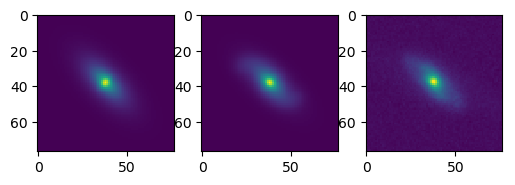

In [9]:
plt.figure(dpi=100)
plt.subplot(131)
plt.imshow(bi_models.iloc[13].render())
plt.subplot(132)
plt.imshow(agg_models.iloc[13].render())
plt.subplot(133)
plt.imshow(bi_models.iloc[13].data)

In [10]:
from gzbuilder_analysis.fitting.jupyter import live_fit

In [11]:
agg_losses.loc[20902052]

0.0006882132103081678

In [12]:
nm, res = live_fit(agg_models.iloc[13])

Fitting model: 0it [00:00, ?it/s]

Fitting model: 1it [00:06,  6.09s/it]

Fitting model: 2it [00:08,  5.09s/it]

Fitting model: 3it [00:11,  4.45s/it]

Fitting model: 4it [00:14,  4.05s/it]

Fitting model: 5it [00:18,  3.79s/it]

Fitting model: 6it [00:21,  3.69s/it]

Fitting model: 7it [00:24,  3.43s/it]

Fitting model: 8it [00:27,  3.35s/it]

Fitting model: 9it [00:30,  3.20s/it]

Fitting model: 10it [00:33,  3.06s/it]

Fitting model: 11it [00:35,  3.00s/it]

Fitting model: 12it [00:39,  3.10s/it]

Fitting model: 13it [00:42,  3.21s/it]

Fitting model: 14it [00:46,  3.28s/it]

Fitting model: 15it [00:49,  3.31s/it]

Fitting model: 16it [00:52,  3.23s/it]

Fitting model: 17it [00:55,  3.19s/it]

Fitting model: 18it [00:58,  3.16s/it]

Fitting model: 19it [01:01,  3.06s/it]

Fitting model: 20it [01:04,  3.09s/it]

Fitting model: 21it [01:10,  4.00s/it]

Fitting model: 22it [01:17,  4.62s/it]

Fitting model: 23it [01:20,  4.13s/it]

Fitting model: 24it [01:23,  3.82s/it]

Fitting model: 25it [01:26,  3.59s/it]

Fitting model: 26it [01:29,  3.46s/it]

Fitting model: 27it [01:32,  3.36s/it]

Fitting model: 28it [01:35,  3.28s/it]

Fitting model: 29it [01:38,  3.30s/it]

Fitting model: 30it [01:42,  3.36s/it]

In [13]:
'{:.5e} -> {:.5e}'.format(agg_losses.iloc[13], res['fun'])

'1.74076e-04 -> 1.57853e-04'

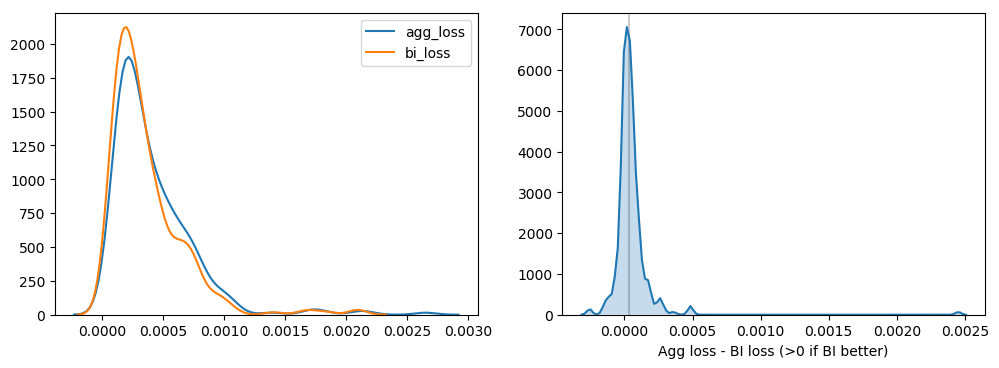

In [14]:
_, axs = plt.subplots(ncols=2, figsize=(12, 4), dpi=100)
plt.sca(axs[0])
sns.kdeplot(agg_losses)
sns.kdeplot(bi_losses)

plt.sca(axs[1])
diff = agg_losses - bi_losses
sns.kdeplot(diff.dropna(), shade=True)
plt.xlabel('Agg loss - BI loss (>0 if BI better)')
l = plt.ylim()[1]
plt.vlines(diff.median(), -10, l, alpha=0.2)
plt.ylim(0, l);

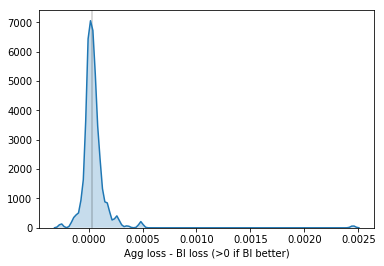

In [15]:
diff = agg_losses - bi_losses
sns.kdeplot(diff.dropna(), shade=True)
plt.xlabel('Agg loss - BI loss (>0 if BI better)')
l = plt.ylim()[1]
plt.vlines(diff.median(), -10, l, alpha=0.2)
plt.ylim(0, l);

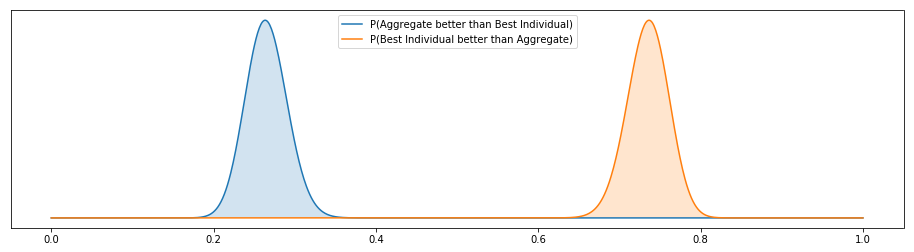

In [16]:
x = np.linspace(0, 1, 1000)
p_agg_better = st.beta.pdf(x, 1 + (diff < 0).sum(), 1 + len(diff) - (diff < 0).sum())
p_bi_better = st.beta.pdf(x, 1 + (diff > 0).sum(), 1 + len(diff) - (diff > 0).sum())
plt.figure(figsize=(16, 4))
plt.plot(x, p_agg_better, label='P(Aggregate better than Best Individual)')
plt.fill_between(x, 0, p_agg_better, alpha=0.2)
plt.plot(x, p_bi_better, label='P(Best Individual better than Aggregate)')
plt.fill_between(x, 0, p_bi_better, alpha=0.2)
plt.legend()
plt.yticks([]);

What do the models look like where the differences between aggregate and models are largest?

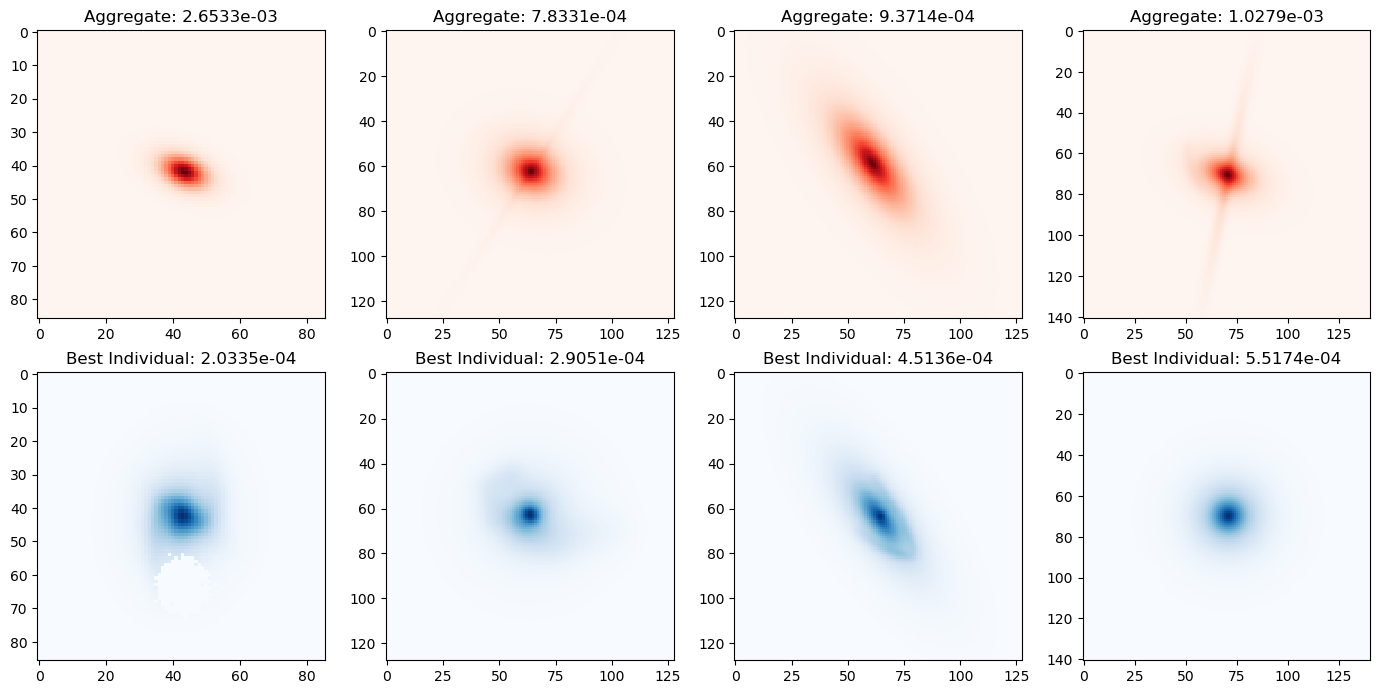

In [17]:
_, ax = plt.subplots(nrows=2, ncols=4, figsize=(14, 7), dpi=100)
for i, idx in enumerate(diff.abs().sort_values(ascending=False).index[:4]):
  agg_better = agg_losses.loc[idx] < bi_losses.loc[idx]
  a = agg_models.loc[idx]
  b = bi_models.loc[idx]
  ax[0][i].imshow(a.render() * a.pixel_mask ,
                  cmap=('Blues' if agg_better else 'Reds'))
  ax[0][i].set_title('Aggregate: {:.4e}'.format(agg_losses.loc[idx]))
  ax[1][i].imshow(b.render() * b.pixel_mask,
                  cmap=('Reds' if agg_better else 'Blues'))
  ax[1][i].set_title('Best Individual: {:.4e}'.format(bi_losses.loc[idx]))
plt.tight_layout()

What about when the models are the most similar?

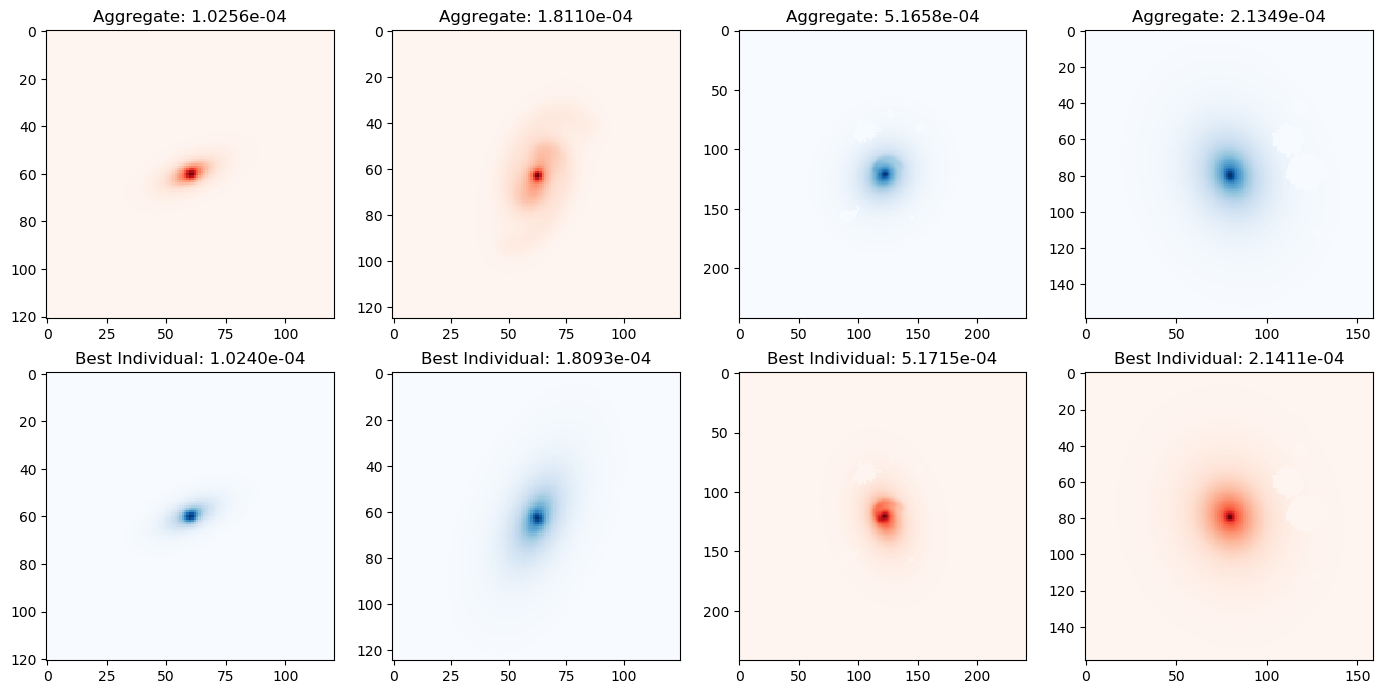

In [18]:
_, ax = plt.subplots(nrows=2, ncols=4, figsize=(14, 7), dpi=100)
for i, idx in enumerate(diff.abs().sort_values(ascending=True).index[:4]):
  agg_better = agg_losses.loc[idx] < bi_losses.loc[idx]
  a = agg_models.loc[idx]
  b = bi_models.loc[idx]
  ax[0][i].imshow(a.render() * a.pixel_mask ,
                  cmap=('Blues' if agg_better else 'Reds'))
  ax[0][i].set_title('Aggregate: {:.4e}'.format(agg_losses.loc[idx]))
  ax[1][i].imshow(b.render() * b.pixel_mask,
                  cmap=('Reds' if agg_better else 'Blues'))
  ax[1][i].set_title('Best Individual: {:.4e}'.format(bi_losses.loc[idx]))
plt.tight_layout()

In [19]:
print('Saving fitted models')
fitted_models = pd.DataFrame([], columns=('agg', 'bi', 'agg_loss', 'bi_loss'))
for i in bi_models.index:
  fitted_models.loc[i] = dict(
    agg=agg_models.loc[i]._model,
    bi=bi_models.loc[i]._model,
    agg_loss=agg_losses.loc[i],
    bi_loss=bi_losses.loc[i],
  )
fitted_models.to_pickle('lib/fitted_models.pickle')

Saving fitted models
